In [153]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
!pip install matplotlib seaborn scipy


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [155]:
df = pd.read_csv("Velocidades_Bitcarrier_Noviembre_2022.csv")[["HORA", "VEL_PROMEDIO", "NAME_FROM"]]
df = df[df["NAME_FROM"] == "KR7"]

In [156]:
# Resumen estadístico de VEL_PROMEDIO
df["VEL_PROMEDIO"].describe()

count    140701.000000
mean         29.386378
std          10.778893
min           4.125000
25%          21.620000
50%          29.503333
75%          37.275000
max          80.420000
Name: VEL_PROMEDIO, dtype: float64

$$IQR=Q3−Q1$$
$$Umbral superior=Q3+1.5×IQR$$
$$Umbral inferior=Q1−1.5×IQR$$

In [157]:
# Detectar outliers
q1 = df["VEL_PROMEDIO"].quantile(0.25)
q3 = df["VEL_PROMEDIO"].quantile(0.75)
iqr = q3 - q1
top_threshold = q1 - 1.5 * iqr
bottom_threshold = q3 + 1.5 * iqr

<Axes: >

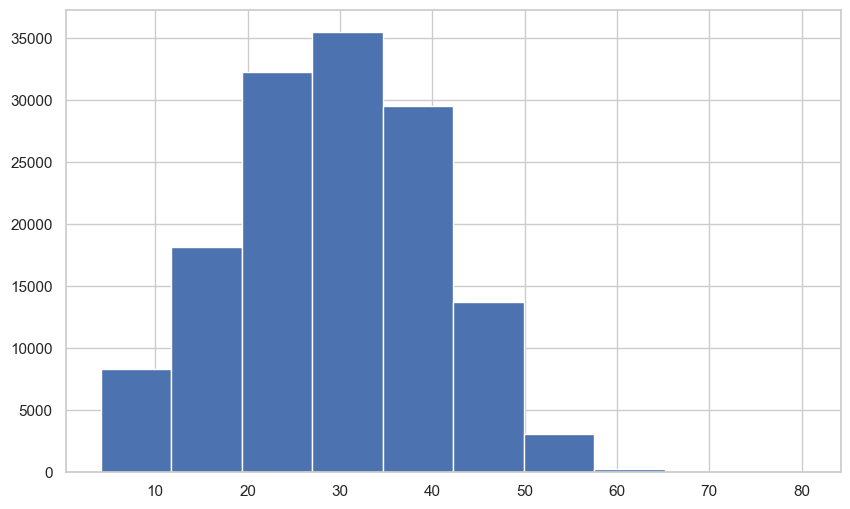

In [158]:
# Count outliers
df["VEL_PROMEDIO"].hist()

array([[<Axes: title={'center': 'VEL_PROMEDIO'}>]], dtype=object)

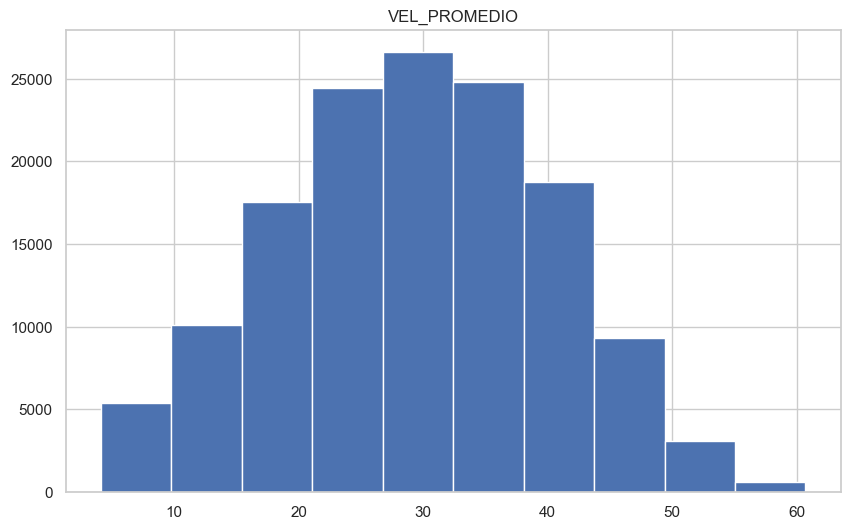

In [159]:
# Remove outliers
df[(df["VEL_PROMEDIO"] >= top_threshold) & (df["VEL_PROMEDIO"] <= bottom_threshold)][["VEL_PROMEDIO"]].hist()

In [160]:
# Remover outliers hace que la distribución tenga una distribución normal
df = df[(df["VEL_PROMEDIO"] >= top_threshold) & (df["VEL_PROMEDIO"] <= bottom_threshold)]

In [161]:
df.head()

,HORA,VEL_PROMEDIO,NAME_FROM
178,0,37.483333,KR7
179,0,39.440000,KR7
180,0,39.880000,KR7
181,0,36.690000,KR7
183,0,39.863333,KR7


In [162]:
hora_17 = df[df["HORA"] == 17]["VEL_PROMEDIO"].to_list()
hora_17_18_19 = df[df["HORA"].isin([17, 18, 19])]["VEL_PROMEDIO"].to_list()

In [163]:
import scipy.stats as stats
# Realizamos la prueba t de dos muestras independientes
t_stat, p_valor = stats.ttest_ind(hora_17, hora_17_18_19, alternative="less")

# Establecemos un nivel de significancia (alfa)
alfa = 0.05

# Comprobamos si rechazamos la hipótesis nula
if p_valor < alfa:
    conclusion = "Hay una diferencia significativa entre las velocidades promedio."
else:
    conclusion = "No hay evidencia de una diferencia significativa entre las velocidades promedio."

# Imprimir conclusión
print(conclusion)
print(f"t_stat: {t_stat}")
print(f"p_valor: {p_valor}")

Hay una diferencia significativa entre las velocidades promedio.
t_stat: -4.321651816799493
p_valor: 7.775489023750408e-06


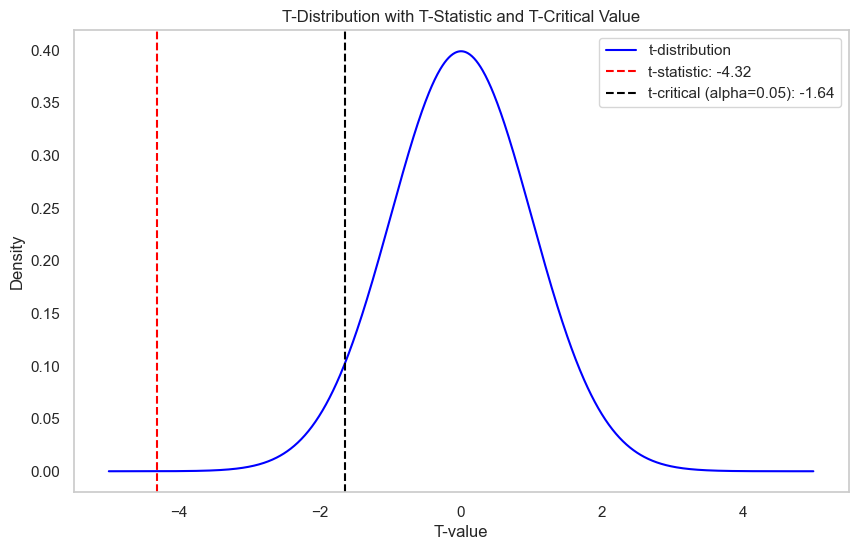

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Degrees of freedom
dof = len(hora_17) + len(hora_17_18_19) - 2

# Generate x values for the t-distribution
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df=dof)

# Plotting the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='t-distribution', color='blue')

# Plot the t-statistic
plt.axvline(t_stat, color='red', linestyle='--', label=f't-statistic: {t_stat:.2f}')

# Calculate and plot the critical value for one-tailed test
t_critical = stats.t.ppf(alfa, df=dof)
plt.axvline(t_critical, color='black', linestyle='--', label=f't-critical (alpha={alfa}): {t_critical:.2f}')

# Adding labels and legend
plt.title('T-Distribution with T-Statistic and T-Critical Value')
plt.xlabel('T-value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


np.float64(1.6449193149577799)